# **Lab 5: Scale Invariant Feature Transform**

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [0]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

## **1. Transform Image**

In [0]:
def rotateImage(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [0]:
img = cv2.imread('sample.jpg')
print(type(img))
print(img.shape)

rotated_img = rotateImage(img, 45)
cv2.imwrite('image_rotated.jpg', rotated_img)

<class 'numpy.ndarray'>
(500, 500, 3)


Text(0.5, 1.0, 'Rotated')

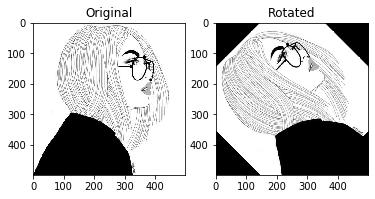

In [0]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img)
a.set_title('Original')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(rotated_img)
a.set_title('Rotated')

## **2. Locate Sift Keypoints**

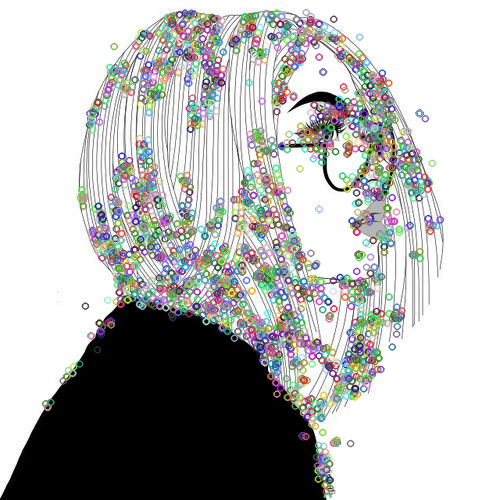

In [0]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints_sift, descriptors = sift.detectAndCompute(img, None)
img = cv2.drawKeypoints(img, keypoints_sift, None)
cv2_imshow(img)

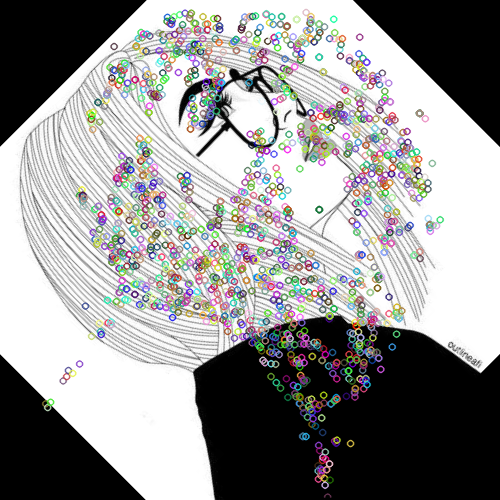

In [0]:
sift_rot = cv2.xfeatures2d.SIFT_create()
rot_keypoints_sift, rot_descriptors = sift_rot.detectAndCompute(rotated_img, None)
rot_img = cv2.drawKeypoints(rotated_img, keypoints_sift, None)
cv2_imshow(rot_img)

## **3.  keypoints shown with and without scale information**

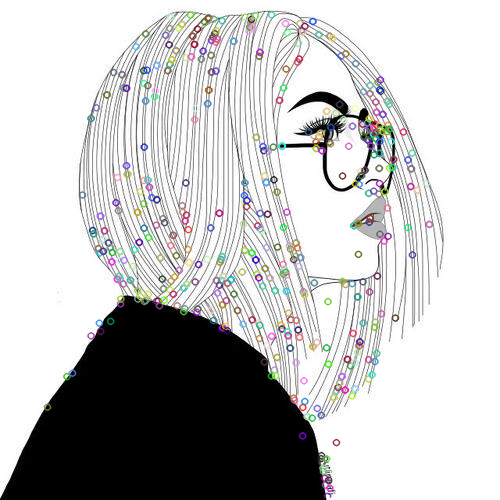

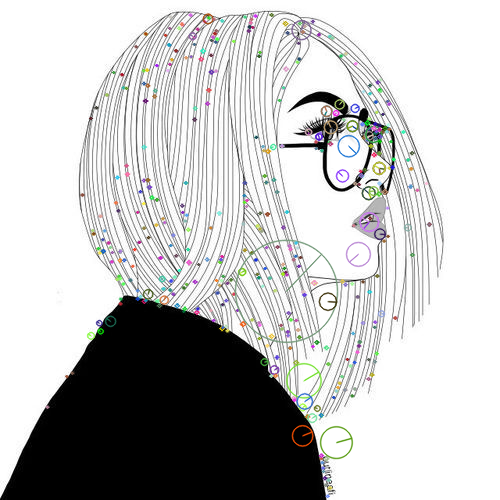

In [0]:
img = cv2.imread('sample.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img)
cv2.imwrite('sift_keypoints.jpg',img)
cv2_imshow(img)
image=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img)
cv2_imshow(image)

## **4. Match keypoints and display correspondence of top 10%-20% matches**

In [0]:
img1 = cv2.imread('image_complete.jpg')
img2 = cv2.imread('image_chunk.jpg')
rot_img = rotateImage(img2, 45)

In [0]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
kp3, des3 = sift.detectAndCompute(rot_img,None)

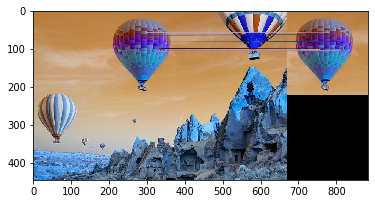

(<matplotlib.image.AxesImage at 0x7f1593913438>, None)

In [0]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

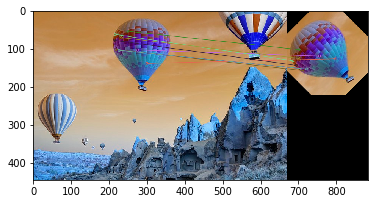

(<matplotlib.image.AxesImage at 0x7f1593878208>, None)

In [0]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)
# Match descriptors.
matches = bf.match(des1,des3)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img4 = cv2.drawMatches(img1,kp1,rot_img,kp3,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img4),plt.show()

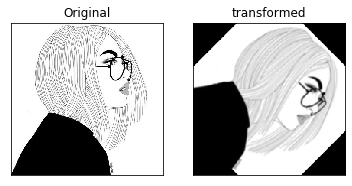

In [0]:
img = cv2.imread('sample.jpg')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
dst = rotateImage(dst, -45)
scale_percent = 40 # percent of original size
width = int(dst.shape[1] * scale_percent / 100)
height = int(dst.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
transformed = cv2.resize(dst, dim, interpolation = cv2.INTER_AREA)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(transformed),plt.title('transformed')
plt.xticks([]), plt.yticks([])
plt.show()

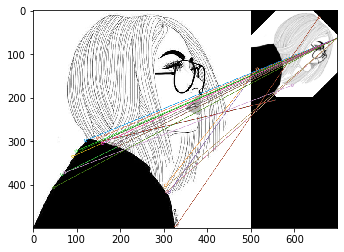

(<matplotlib.image.AxesImage at 0x7f1593239cf8>, None)

In [0]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(transformed,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)
# Match descriptors.
matches = bf.match(des1,des3)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
comparison = cv2.drawMatches(img,kp1,transformed,kp3,matches[:20],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(comparison),plt.show()

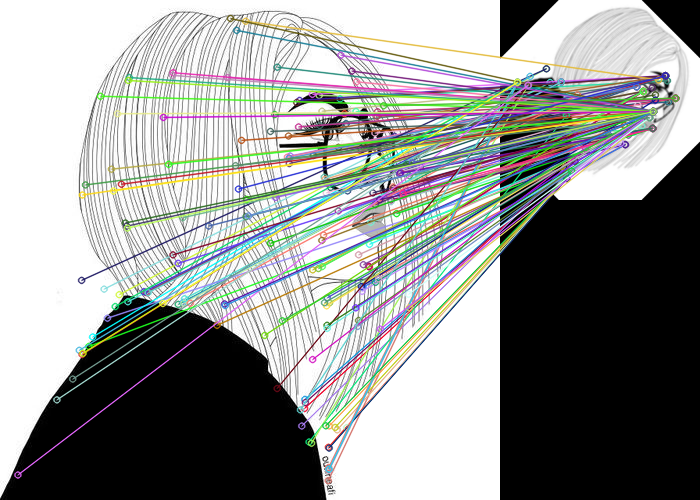

-1

In [0]:
img1 = img
img2 = transformed
#-- Step 1: Detect the keypoints using SURF Detector, compute the descriptors
minHessian = 400
detector = cv2.xfeatures2d_SURF.create(hessianThreshold=minHessian)
keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
#-- Step 2: Matching descriptor vectors with a FLANN based matcher
# Since SURF is a floating-point descriptor NORM_L2 is used
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)
#-- Filter matches using the Lowe's ratio test
ratio_thresh = 0.8
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)
#-- Draw matches
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#-- Show detected matches
cv2_imshow(img_matches)
cv2.waitKey()